<a href="https://colab.research.google.com/github/Katmalu/Suicide_Rates_Overview_1985_to_2016/blob/main/Suicide_Rates_Overview_1985_to_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План работы


0) Загрузить датасет, сделать первичную обработку

1) Посмотреть на интересные значения, найти общие корреляции, описать, что происходит в датасете

2) Посмотреть на зависимости по времени (от года), от пола, от возраста / поколения и по странам, построить кучку графиков на этот счёт

3) Построить модельку для найденной значимой корреляции (в россии) между ввп на душу населения и количеством суицидов на 100 тыс населения
(и сравнить с рандомной страной)

4) Посмотреть на то, есть ли по странам корреляция между этими показателями, построить график

Библиотечки

In [ ]:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import random

Импорт датасета из гитхаба (почему я не знал об этом раньше?)

In [ ]:
!wget https://github.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/raw/main/master.csv

--2022-12-23 07:04:14--  https://github.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/raw/main/master.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/main/master.csv [following]
--2022-12-23 07:04:14--  https://raw.githubusercontent.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/main/master.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2706377 (2.6M) [text/plain]
Saving to: ‘master.csv.3’

master.csv.3        100%[===================>]   2.58M  --.-KB/s    in 0.07s   

2022-12-23 07:04:14 (37.5 MB/s) - ‘master.csv.3’ saved [2706377/2706377

In [ ]:
data = pd.read_csv('master.csv')

In [ ]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [ ]:
data.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
10292,Greece,2007,female,25-34 years,12,816668,1.47,Greece2007,NaN,"318,497,936,901",29896,Generation X
8507,Estonia,2007,female,25-34 years,2,91870,2.18,Estonia2007,NaN,"22,237,061,730",17504,Generation X
13496,Japan,1996,male,75+ years,1339,2633000,50.85,Japan1996,NaN,"4,833,712,542,207",40693,G.I. Generation
9224,France,1996,female,35-54 years,1135,8060200,14.08,France1996,NaN,"1,605,675,086,550",29305,Boomers
22112,Serbia,2010,male,75+ years,204,218129,93.52,Serbia2010,0.757,"39,460,357,731",5682,Silent
571,Antigua and Barbuda,2014,male,25-34 years,0,6928,0.00,Antigua and Barbuda2014,0.783,"1,280,133,333",14093,Millenials
24519,Sweden,1999,female,55-74 years,88,885033,9.94,Sweden1999,NaN,"270,847,937,645",32328,Silent
19636,Portugal,2011,female,75+ years,43,596657,7.21,Portugal2011,0.825,"244,895,101,712",24337,Silent
10811,Guatemala,1994,female,75+ years,0,58014,0.00,Guatemala1994,NaN,"12,983,235,568",1538,G.I. Generation
9438,France,2014,female,75+ years,424,3677450,11.53,France2014,0.888,"2,852,165,760,630",47318,Silent


# **Описание и проверка данных:**
**country** - страна

**year** - год за который собраны данные

**sex** - пол (male, female)

**age** - возраст

**suicides_no** - количество суицидов для данной гендерно-возрастной категории

**population** - количество людей для данной гендерно-возрастной категории

**suicides/100k** - количество суицидов на 100 тысяч населения для данной гендерно-возрастной категории

**HDI for year** - индекс человеческого развития ([ИЧР](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D1%82%D0%B8%D1%8F)) для данной страны в этом году

**gdp_for_year (\$)** - ВВП данной страны за год

**gdp_per_capita (\$)** - ВВП на душу населения данной страны за год

**generation** - [поколение](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


для части стран или годов отсутствует ИЧР, также ВВП объект а не число. Все остальные данные полные

In [ ]:
year_pop = data[['year', 'population']].groupby(['year']).sum()
year_pop

,population
year,
1985,1008600086
1986,1029909613
1987,1095029726
1988,1054094424
1989,1225514347
1990,1466620100
1991,1489988384
1992,1569539447
1993,1530416654


In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Заметим что для 2016 существенно меньшая выборка, так что мы удалим его

А также переименуем столбцы для удобства

In [ ]:
data = data[data['year'] < 2016]
data.rename(columns = {'gdp_per_capita ($)':'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year','suicides/100k pop' : 'suicides/100k'}, inplace = True )

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Дальше сделаем из ввп число (так как в датасете он определяется как объект)

In [ ]:
data["gdp_for_year"] = data["gdp_for_year"].str.replace(',', '')
data["gdp_for_year"] = data["gdp_for_year"].astype(np.int64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27660 non-null  object 
 1   year            27660 non-null  int64  
 2   sex             27660 non-null  object 
 3   age             27660 non-null  object 
 4   suicides_no     27660 non-null  int64  
 5   population      27660 non-null  int64  
 6   suicides/100k   27660 non-null  float64
 7   country-year    27660 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27660 non-null  int64  
 10  gdp_per_capita  27660 non-null  int64  
 11  generation      27660 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


In [ ]:
data[['HDI for year', 'gdp_per_capita']].corr()

,HDI for year,gdp_per_capita
HDI for year,1.000000,0.771228
gdp_per_capita,0.771228,1.000000


Так как корреляция между ИЧР и ВВП на душу населения достаточно существенная и ИЧР в основном представлен в виде NaN, в дальнейшем мы будем анализировать ВВП на душу населения


Также ниже будут некоторые интересные моменты в датасете

In [ ]:
country = data['country'].unique()
contries_numb = len(country)
years_numb = len(data['year'].unique())
year_min = data['year'].min()
year_max = data['year'].max()
suicides_no = data['suicides_no'].sum()
age = list(data['age'].unique())
age.sort(key = lambda x: x.split("-")[-1])
generation = data['generation'].unique()

In [ ]:
print(f'В таблице содержатся данные по {suicides_no} случаям суицида, произошедшим в {contries_numb} странам за {years_numb} года с {year_min} по {year_max} год')

В таблице содержатся данные по 6732817 случаям суицида, произошедшим в 100 странам за 31 года с 1985 по 2015 год


In [ ]:
print(f'Список возрастных групп: {", ".join(age)}')

Список возрастных групп: 5-14 years, 15-24 years, 25-34 years, 35-54 years, 55-74 years, 75+ years


In [ ]:
print(f'Список поколений: {", ".join(generation)}')

Список поколений: Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


Здесь не очень понятно, как определяют поколения авторы датасета, так что мы взяли относительно общепринятые рамки (учитывая дискуссионность данного вопроса)

In [ ]:
generation_l = ["G.I. Generation", "Silent", "Boomers", "Generation X", "Millenials", "Generation Z"]

In [ ]:
generation_list = {"G.I. Generation" : [1901, 1927], "Silent" : [1928, 1945], "Boomers" : [1945, 1962], "Generation X" : [1963, 1980], "Millenials" : [1981, 1996], "Generation Z" : [1997, 2012]}

In [ ]:
for i in generation_list:
  print(f'{i} c {generation_list[i][0]} по {generation_list[i][1]} год')

G.I. Generation c 1901 по 1927 год
Silent c 1928 по 1945 год
Boomers c 1945 по 1962 год
Generation X c 1963 по 1980 год
Millenials c 1981 по 1996 год
Generation Z c 1997 по 2012 год


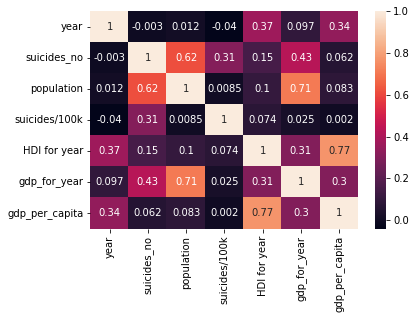

In [ ]:
sns.heatmap(data.corr(), annot = True)

Как мы видим, общих хороших корреляций (кроме отмеченных выше или абсолютно логичных, как количество суицидов vs население) не наблюдается, так что придётся анализировать данные отдельно по годам, странам и особенно полу.

# Зависимость от года:

Для начала посмотрим на то, как менялось количество суцицдов на 100 тыс. населения за год по миру (в рамках нашего датасета)

In [ ]:
year_sum = data[['year', 'suicides_no', 'population']].groupby(['year']).sum()
year_sum['suicides/100k'] = year_sum['suicides_no']*100000/year_sum['population']

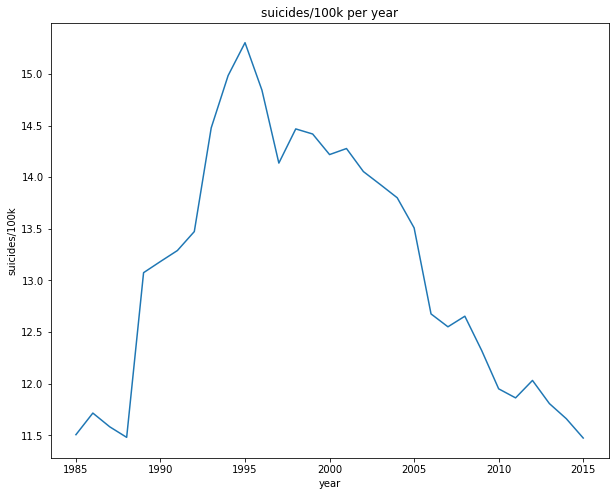

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=year_sum, y='suicides/100k', x='year')
plt.ylabel('suicides/100k')
plt.title("suicides/100k per year")
plt.show()

# Зависимость от пола:

In [ ]:
female = data[data['sex']=='female']['suicides_no'].sum()
male = data[data['sex']=='male']['suicides_no'].sum()
femalen = data[data['sex']=='female']['population'].sum()
malen = data[data['sex']=='male']['population'].sum()
print(f'В срежнем в популяции {round(malen/(malen+femalen)*100,2)}% - мужчины, {round(femalen/(malen+femalen)*100,2)}% - женщины, но при этом {round(male/(male+female)*100,2)}% суицидов были совершены мужчинами, {round(female/(male+female)*100,2)}% - женщинами')

В срежнем в популяции 48.81% - мужчины, 51.19% - женщины, но при этом 76.89% суицидов были совершены мужчинами, 23.11% - женщинами


Учитывая такое соотношение, разумно будет проводить анализ и делать выводы отдельно для каждого пола, так как они достаточно сильно различаются.

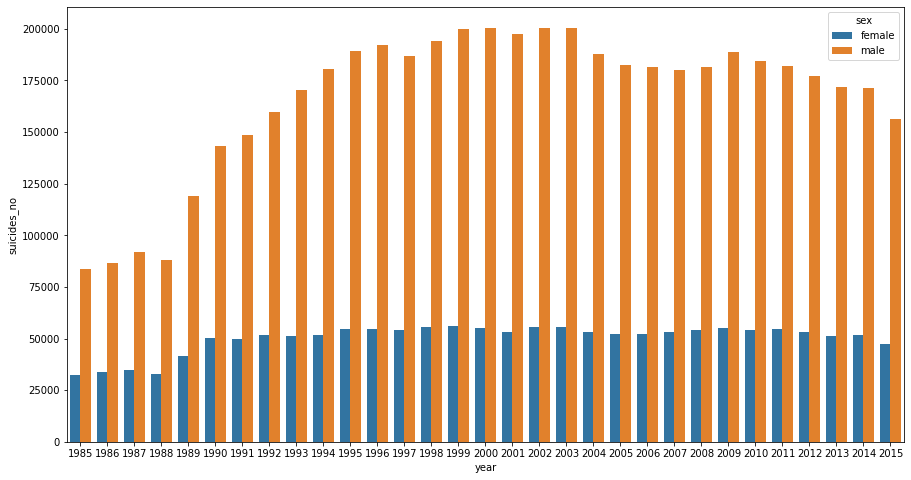

In [ ]:
plt.figure(figsize=(15,8))
graph = data[['sex', 'year', 'suicides_no']].groupby(["year","sex"]).sum()
graph = graph.reset_index()
sns.barplot(data=graph, y='suicides_no', x='year', hue = "sex")

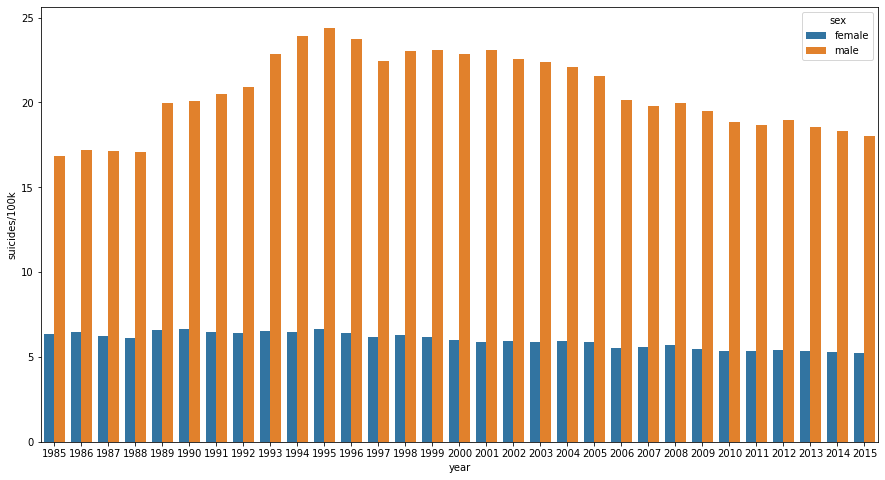

In [ ]:
plt.figure(figsize=(15,8))
graph_100k = data[['sex', 'year', 'suicides_no', 'population']].groupby(["year","sex"]).sum()
graph_100k['suicides/100k'] = graph_100k['suicides_no']*100000/graph_100k['population']
graph_100k = graph_100k.reset_index()
sns.barplot(data=graph_100k, y='suicides/100k', x='year', hue = "sex")

# Поколения и возраста:

Здесь можно посмотреть, что происходит, в зависимости от поколения и от возраста респондентов

In [ ]:
gen = data.groupby(["year", "generation"])["suicides_no", "population"].sum()
gen["suicides/100k"] = gen["suicides_no"]*100000/gen["population"]
gen

<ipython-input-118-45d9fa12a8f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen = data.groupby(["year", "generation"])["suicides_no", "population"].sum()


suicides_no  population  suicides/100k
year generation                                             
1985 Boomers                20771   173536624      11.969231
     G.I. Generation        40690   192849873      21.099314
     Generation X           18854   396166961       4.759105
     Silent                 35748   246046628      14.528953
1986 Boomers                21685   176214788      12.306005
...                           ...         ...            ...
2015 Boomers                53588   354566127      15.113683
     Generation X           71298   515972039      13.818191
     Generation Z            1681   246636333       0.681570
     Millenials             53959   540924338       9.975332
     Silent                 23114   116559095      19.830284

[142 rows x 3 columns]

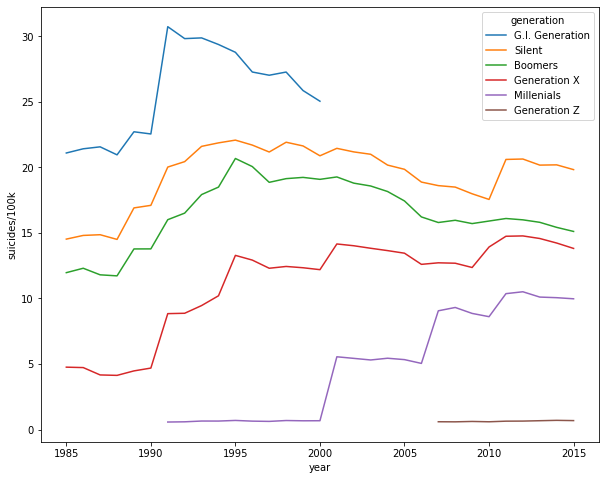

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=gen, y='suicides/100k', x='year', hue = "generation", hue_order = generation_l)

In [ ]:
age_graph = data.groupby(["year", "age"])["suicides_no", "population"].sum()
age_graph["suicides/100k"] = age_graph["suicides_no"]*100000/age_graph["population"]
age_graph

<ipython-input-120-891262ba43c1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_graph = data.groupby(["year", "age"])["suicides_no", "population"].sum()


suicides_no  population  suicides/100k
year age                                                
1985 15-24 years        17870   196974439       9.072243
     25-34 years        20771   173536624      11.969231
     35-54 years        35748   246046628      14.528953
     5-14 years           984   199192522       0.493994
     55-74 years        28736   152769432      18.810046
...                       ...         ...            ...
2015 25-34 years        32118   279250191      11.501514
     35-54 years        71298   515972039      13.818191
     5-14 years          1681   246636333       0.681570
     55-74 years        53588   354566127      15.113683
     75+ years          23114   116559095      19.830284

[186 rows x 3 columns]

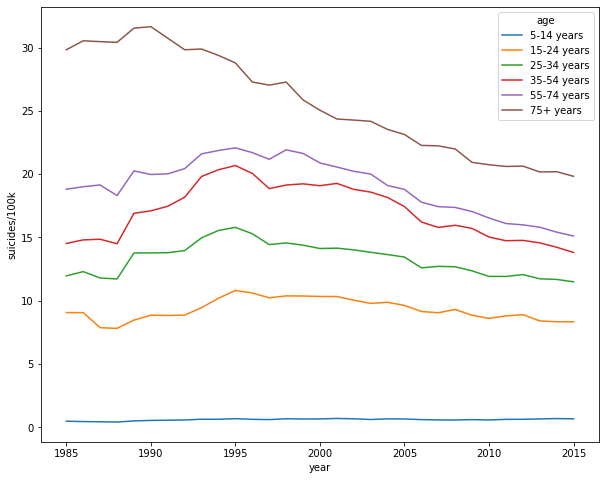

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=age_graph, y='suicides/100k', x='year', hue = "age", hue_order = age)

Как мы видим, чем старше поколение или возрастная группа, тем больше в ней наблюдается суицидов

# Аналитика по странам:

Мы понимаем, что условия в разных странах могут сильно отличаться, так что было бы интересно посмотреть, есть ли какие-то интересные корреляции отдельно по странам. Здесь мы посчитали основными осмысленными показателями ВВП и количество суицидов на 100тыс населения (и смотрим на их корреляцию)

In [ ]:
country_graph = data[['country', 'year', 'sex', 'suicides_no', 'population']].groupby(['country', 'year', 'sex']).sum()
country_graph['gdp_per_capita'] = data.groupby(['country', 'year', 'sex']).mean()['gdp_per_capita']
country_graph = country_graph.reset_index()
country_graph['suicides/100k'] = country_graph['suicides_no']*100000/country_graph['population']
country_graph

,country,year,sex,suicides_no,population,gdp_per_capita,suicides/100k
0,Albania,1987,female,25,1316900,796.0,1.898398
1,Albania,1987,male,48,1392700,796.0,3.446543
2,Albania,1988,female,22,1343600,769.0,1.637392
3,Albania,1988,male,41,1420700,769.0,2.885901
4,Albania,1989,female,15,1363300,833.0,1.100271
...,...,...,...,...,...,...,...
4605,Uzbekistan,2012,male,1220,13077518,1964.0,9.328987
4606,Uzbekistan,2013,female,628,13531933,2150.0,4.640874
4607,Uzbekistan,2013,male,1322,13306991,2150.0,9.934628
4608,Uzbekistan,2014,female,690,13767888,2309.0,5.011662


In [ ]:
country_graph_age = data[['country', 'year', 'sex', 'suicides_no', 'population','age']].groupby(['country', 'year', 'sex','age']).sum()
country_graph_age['gdp_per_capita'] = data.groupby(['country', 'year', 'sex','age']).mean()['gdp_per_capita']
country_graph_age = country_graph_age.reset_index()
country_graph_age['suicides/100k'] = country_graph_age['suicides_no']*100000/country_graph_age['population']
country_graph_age

,country,year,sex,age,suicides_no,population,gdp_per_capita,suicides/100k
0,Albania,1987,female,15-24 years,14,289700,796.0,4.832585
1,Albania,1987,female,25-34 years,4,257200,796.0,1.555210
2,Albania,1987,female,35-54 years,6,278800,796.0,2.152080
3,Albania,1987,female,5-14 years,0,311000,796.0,0.000000
4,Albania,1987,female,55-74 years,0,144600,796.0,0.000000
...,...,...,...,...,...,...,...,...
27655,Uzbekistan,2014,male,25-34 years,318,2739150,2309.0,11.609441
27656,Uzbekistan,2014,male,35-54 years,519,3421300,2309.0,15.169672
27657,Uzbekistan,2014,male,5-14 years,60,2762158,2309.0,2.172215
27658,Uzbekistan,2014,male,55-74 years,144,1271111,2309.0,11.328672


Для России достаточно заметны корреляции

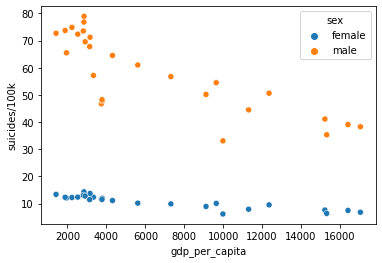

In [ ]:
sns.scatterplot(data=country_graph[country_graph['country'] == "Russian Federation"], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "sex")

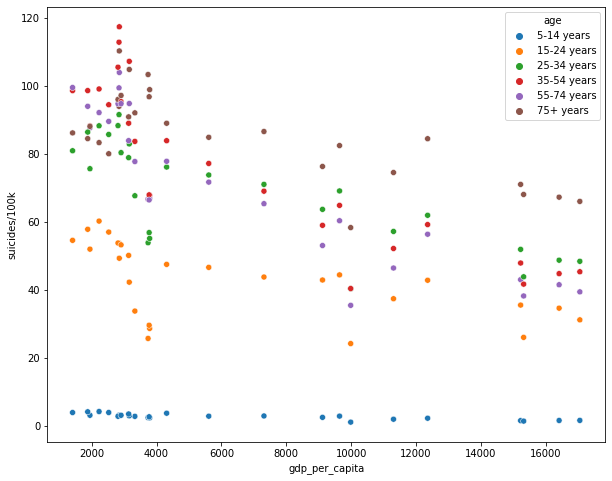

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=country_graph_age[(country_graph_age['country'] == "Russian Federation") & (country_graph_age['sex'] == "male")], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "age", hue_order = age)

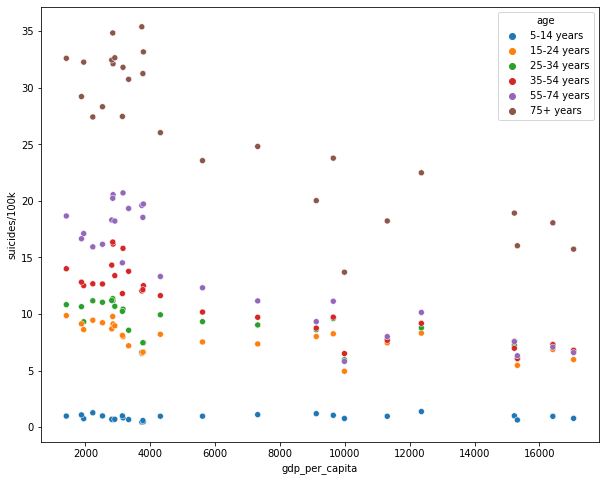

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=country_graph_age[(country_graph_age['country'] == "Russian Federation") & (country_graph_age['sex'] == "female")], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "age", hue_order = age)

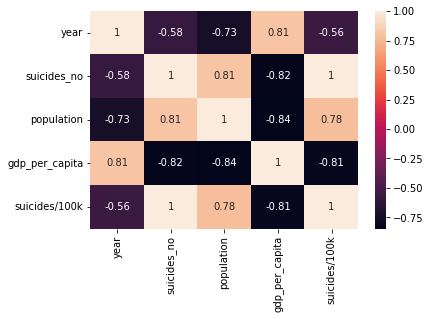

In [ ]:
sns.heatmap(country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "male")].corr(), annot = True)

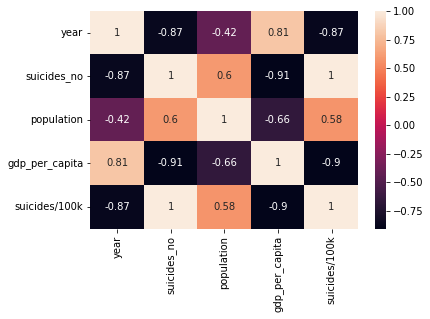

In [ ]:
sns.heatmap(country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "female")].corr(), annot = True)

Зависимость длдя россии досаточно похожа на линейную, так что можно попробовать сделать модельку с помощью линейной регрессии

In [ ]:
x = country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "male")]['gdp_per_capita']
x = sm.add_constant(x)
y = country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "male")]['suicides/100k']
russia_model_m = sm.OLS(y, x)
russia_res_m = russia_model_m.fit()
print(russia_res_m.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides/100k   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     49.21
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.36e-07
Time:                        07:24:01   Log-Likelihood:                -94.908
No. Observations:                  27   AIC:                             193.8
Df Residuals:                      25   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             72.9845      2.684     27.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x = country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "female")]['gdp_per_capita']
x = sm.add_constant(x)
y = country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "female")]['suicides/100k']
russia_model_f = sm.OLS(y, x)
russia_res_f = russia_model_f.fit()
print(russia_res_f.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides/100k   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     112.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           9.55e-11
Time:                        07:24:15   Log-Likelihood:                -38.837
No. Observations:                  27   AIC:                             81.67
Df Residuals:                      25   BIC:                             84.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.6503      0.336     40.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Можно сказать, что в россии зависимость суицидов от ввп на душу населения достаточно близка к линейной (особенно у женщин)

Рандомная страна (или конкретная, если нужно)

In [ ]:
random_country = country[round(random.random()*len(country))]
random_country

'Turkey'

In [ ]:
random_country = input()

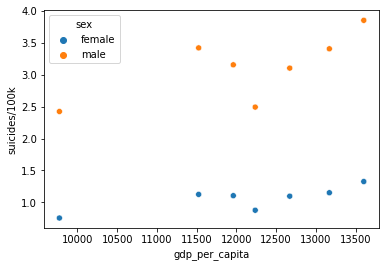

In [ ]:
sns.scatterplot(data=country_graph[country_graph['country'] == random_country], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "sex")

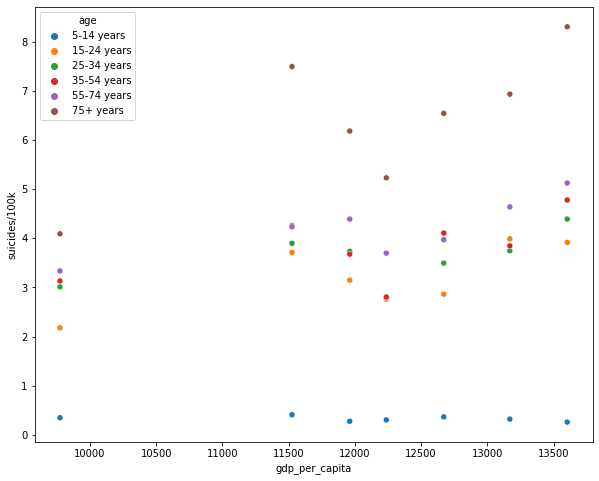

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=country_graph_age[(country_graph_age['country'] == random_country) & (country_graph_age['sex'] == "male")], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "age", hue_order = age)

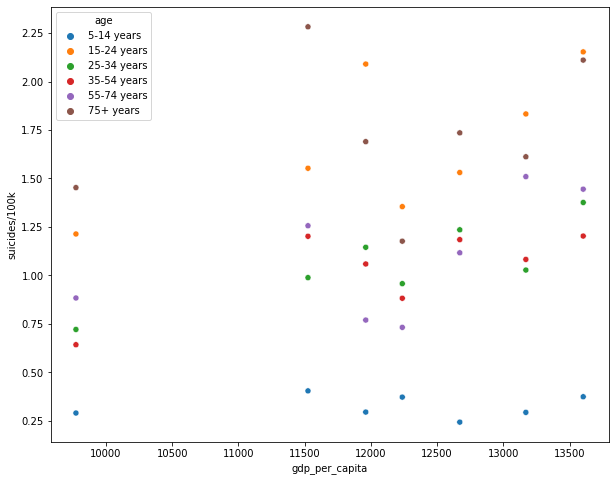

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=country_graph_age[(country_graph_age['country'] == random_country) & (country_graph_age['sex'] == "female")], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "age", hue_order = age)

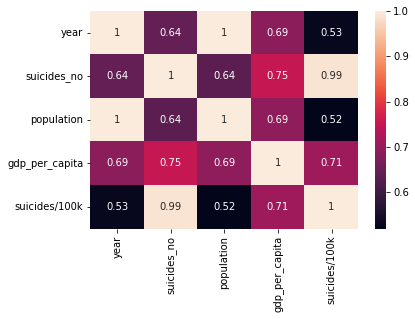

In [ ]:
sns.heatmap(country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "male")].corr(), annot = True)

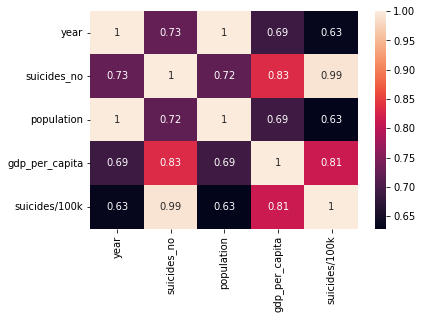

In [ ]:
sns.heatmap(country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "female")].corr(), annot = True)

In [ ]:
x = country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "male")]['gdp_per_capita']
x = sm.add_constant(x)
y = country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "male")]['suicides/100k']
random_model_m = sm.OLS(y, x)
random_res_m = random_model_m.fit()
print(random_res_m.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides/100k   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     5.047
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0746
Time:                        07:24:23   Log-Likelihood:                -2.2865
No. Observations:                   7   AIC:                             8.573
Df Residuals:                       5   BIC:                             8.465
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3892      1.569     -0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
x = country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "female")]['gdp_per_capita']
x = sm.add_constant(x)
y = country_graph[(country_graph['country'] == random_country) & (country_graph['sex'] == "female")]['suicides/100k']
random_model_f = sm.OLS(y, x)
random_res_f = random_model_f.fit()
print(random_res_f.summary())

                            OLS Regression Results                            
Dep. Variable:          suicides/100k   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     9.824
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0258
Time:                        07:24:30   Log-Likelihood:                 6.0992
No. Observations:                   7   AIC:                            -8.198
Df Residuals:                       5   BIC:                            -8.307
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4141      0.474     -0.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Возможно, тут получилось что-то хорошее, но как мы узнаем далее, это совершенно не гарантированно

# Корреляция между ввп на душу населения и суицидами на 100 тыс человек по странам

Интересно посмотреть, есть ли хорошая корреляция между ввп на душу населения и уровнем суицидов в других странах

In [ ]:
Corr_gpd_suic_100k_country = []
Corr_gpd_suic_100k_corr = []
for i in country_graph["country"].unique():
  a = country_graph[(country_graph["country"] == i)  &  (country_graph["sex"] == 'male')].corr()['gdp_per_capita']['suicides/100k']
  if not np.isnan(a):
    Corr_gpd_suic_100k_country.append(i)
    Corr_gpd_suic_100k_corr.append(a)

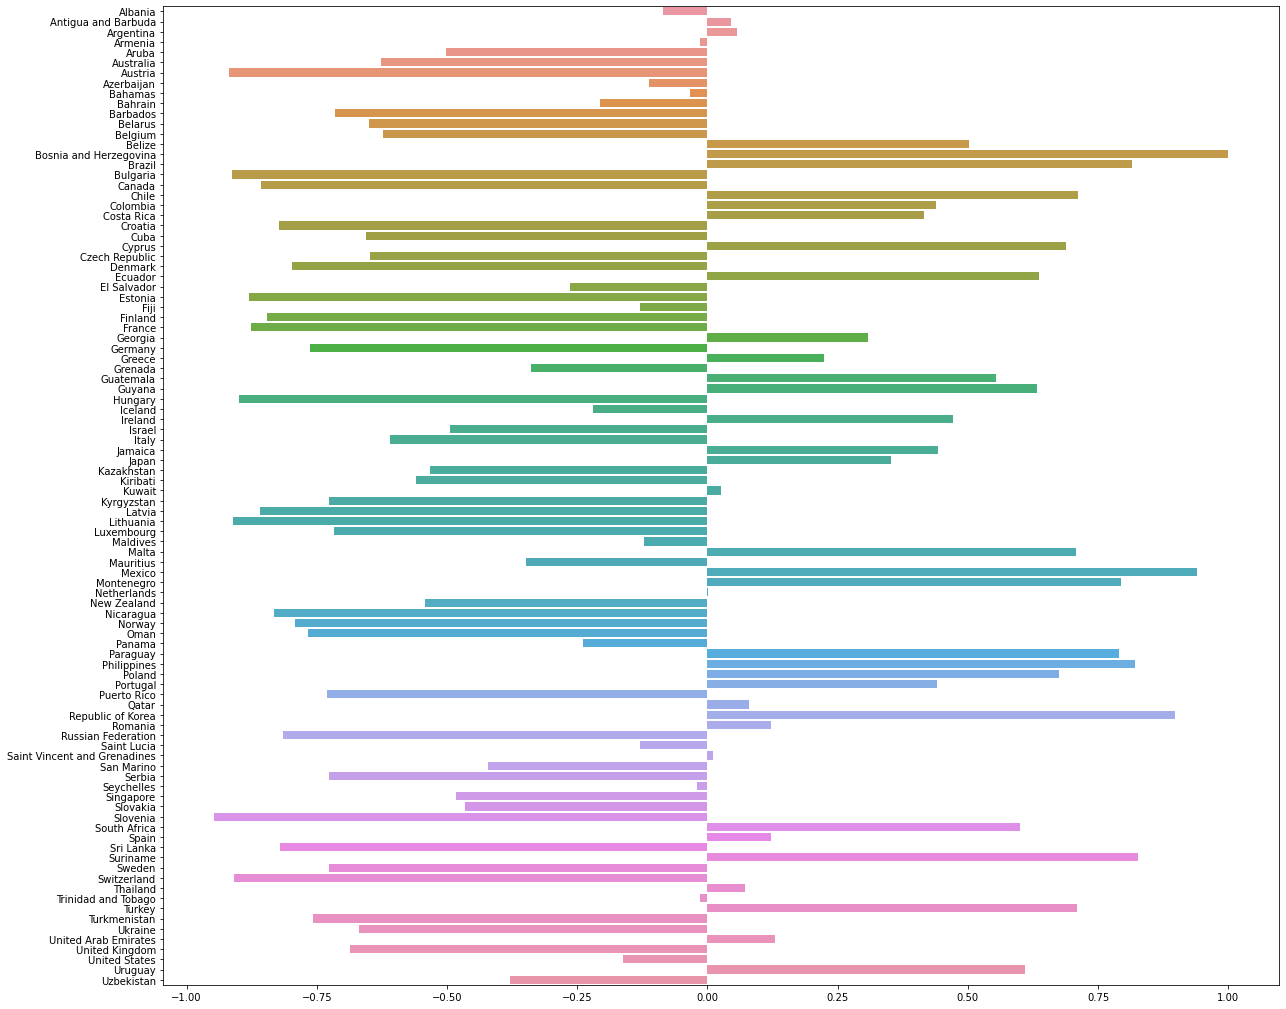

In [ ]:
plt.figure(figsize=(20,18))
sns.barplot(x=Corr_gpd_suic_100k_corr, y=Corr_gpd_suic_100k_country)


In [ ]:
Corr_gpd_suic_100k_country_f = []
Corr_gpd_suic_100k_corr_f = []
for i in country_graph["country"].unique():
  a = country_graph[(country_graph["country"] == i)  &  (country_graph["sex"] == 'female')].corr()['gdp_per_capita']['suicides/100k']
  if not np.isnan(a):
    Corr_gpd_suic_100k_country_f.append(i)
    Corr_gpd_suic_100k_corr_f.append(a)

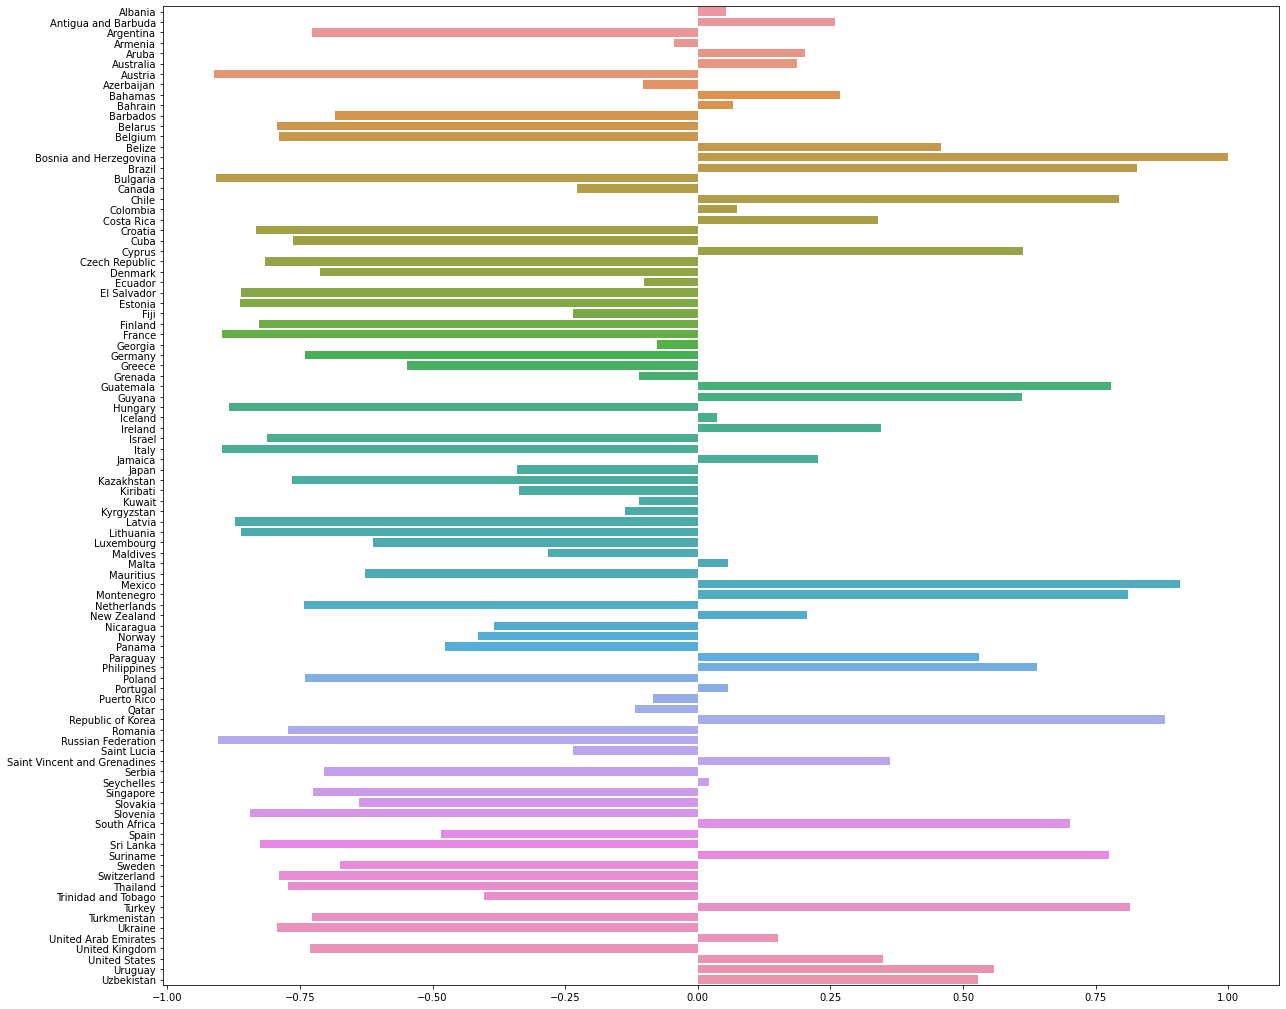

In [ ]:
plt.figure(figsize=(20,18))
sns.barplot(x=Corr_gpd_suic_100k_corr_f, y=Corr_gpd_suic_100k_country_f)

# Может понадобиться а может и нет

In [ ]:
data[['year', 'country']].groupby('year')['country'].nunique()

year
1985    48
1986    48
1987    54
1988    49
1989    52
1990    64
1991    64
1992    65
1993    65
1994    68
1995    78
1996    77
1997    77
1998    79
1999    83
2000    86
2001    88
2002    86
2003    86
2004    84
2005    84
2006    85
2007    86
2008    85
2009    89
2010    88
2011    86
2012    81
2013    80
2014    78
2015    62
Name: country, dtype: int64

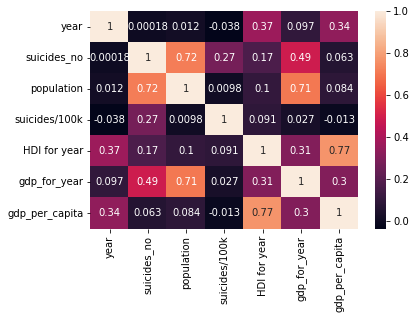

In [ ]:
sns.heatmap(data[data['sex'] == 'male'].corr(),annot=True)

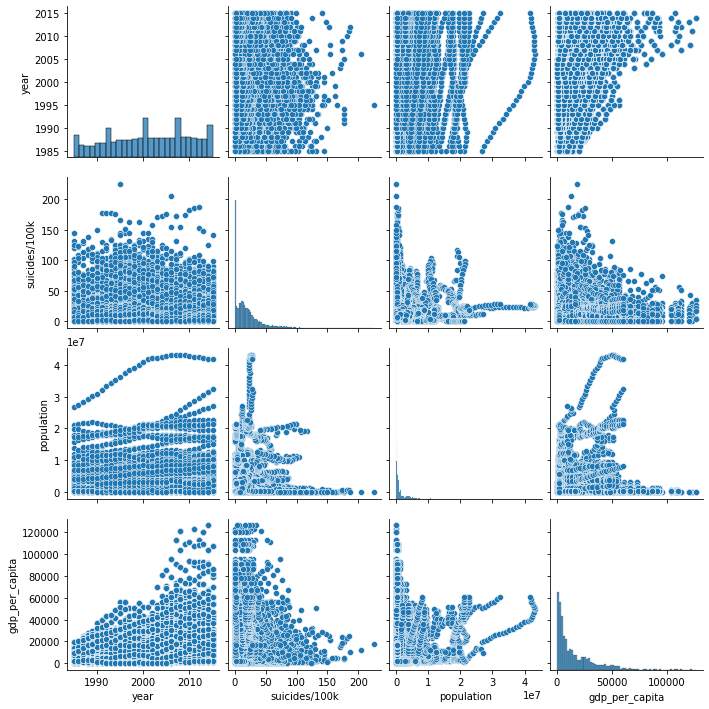

In [ ]:
sns.pairplot(data = data[data['sex'] == 'male'], vars = ['year', 'suicides/100k', 'population', 'gdp_per_capita'])

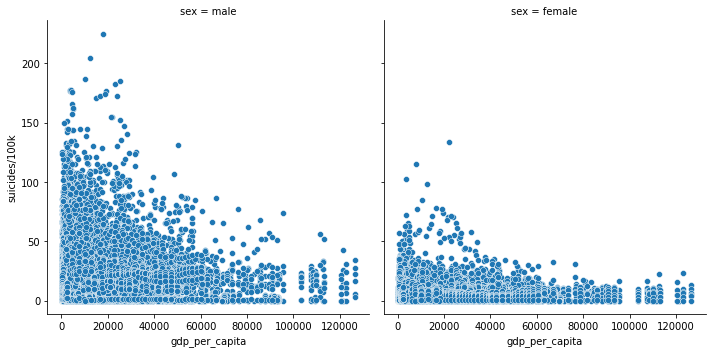

In [ ]:
sns.relplot(data = data, y='suicides/100k', x='gdp_per_capita', ci = None, col = "sex")

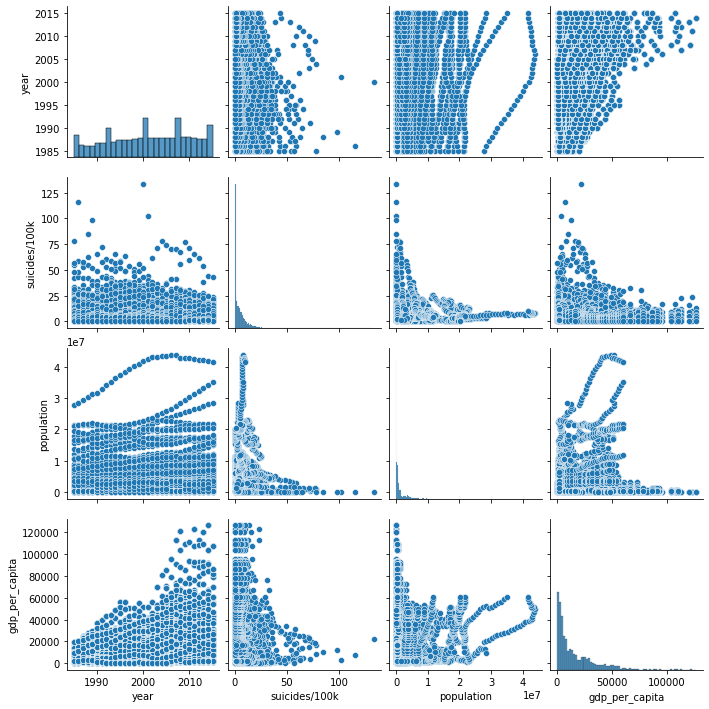

In [ ]:
sns.pairplot(data = data[data['sex'] == 'female'], vars = ['year', 'suicides/100k', 'population', 'gdp_per_capita'])

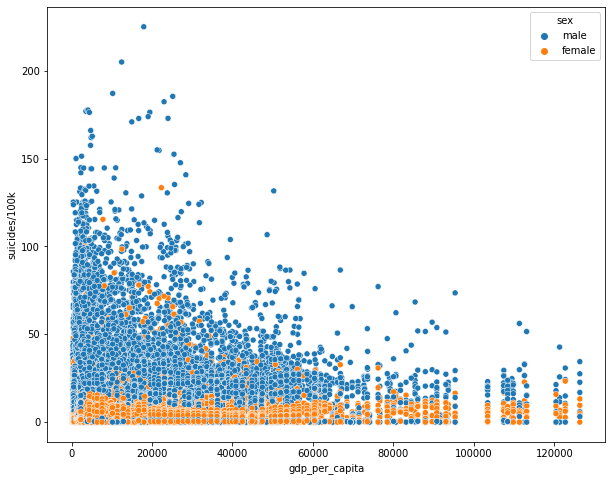

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, y = "suicides/100k", x = 'gdp_per_capita', hue = "sex")

In [ ]:
cuntry_graph = data.groupby(["country"])["suicides_no", "population"].sum()
cuntry_graph["suicides/100k"] = cuntry_graph["suicides_no"]*100000/cuntry_graph["population"]
cuntry_graph

<ipython-input-157-9ae743fc1f91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cuntry_graph = data.groupby(["country"])["suicides_no", "population"].sum()


,suicides_no,population,suicides/100k
country,,,
Albania,1970,62325467,3.160827
Antigua and Barbuda,11,1990228,0.552700
Argentina,82219,1035985431,7.936309
Armenia,1838,74948140,2.452362
Aruba,101,1259677,8.017928
...,...,...,...
United Arab Emirates,622,36502275,1.704003
United Kingdom,136805,1738767780,7.867928
United States,1034013,8054027201,12.838459


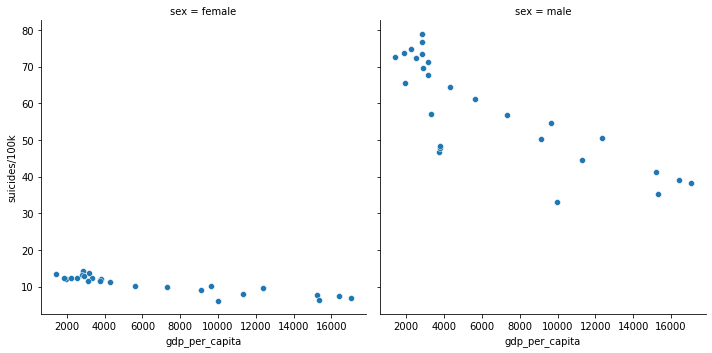

In [ ]:
sns.relplot(data=country_graph[country_graph['country'] == "Russian Federation"], y='suicides/100k', x='gdp_per_capita', col = "sex", kind="scatter")

In [ ]:
sex_sum = data[['sex', 'year', 'suicides_no']][data['sex']=='female'].groupby('year').sum()
sex_sum.rename(columns = {'suicides_no':'suicides_no_female'}, inplace = True )
sex_sum['suicides_no_male'] = data[['sex', 'year', 'suicides_no']][data['sex']=='male'].groupby('year').sum()['suicides_no']
sex_sum['population_female'] = data[['sex', 'year', 'population']][data['sex']=='female'].groupby('year').sum()['population']
sex_sum['population_male'] = data[['sex', 'year', 'population']][data['sex']=='male'].groupby('year').sum()['population']
sex_sum['suicides/100k_female'] = sex_sum['suicides_no_female']*100000/sex_sum['population_female']
sex_sum['suicides/100k_male'] = sex_sum['suicides_no_male']*100000/sex_sum['population_male']

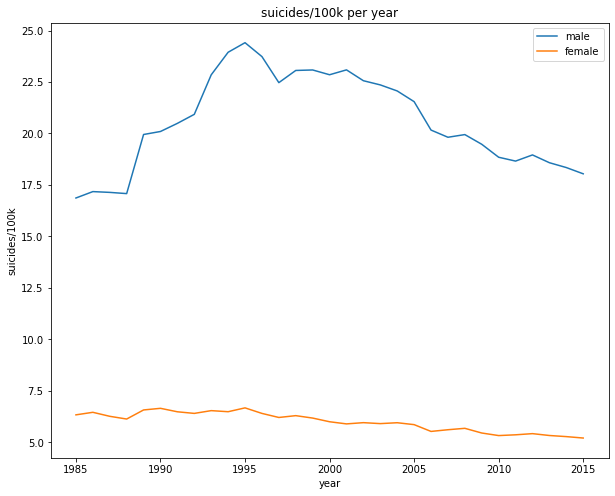

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=sex_sum, y='suicides/100k_male', x='year')
sns.lineplot(data=sex_sum, y='suicides/100k_female', x='year')
plt.legend(['male', 'female'])
plt.ylabel('suicides/100k')
plt.title("suicides/100k per year")
plt.show()

In [ ]:
Corr_gpd_suic_100k = dict()
for i in country_graph["country"].unique():
  Corr_gpd_suic_100k[i] = country_graph[(country_graph["country"] == i)  &  (country_graph["sex"] == 'male')].corr()['gdp_per_capita']['suicides/100k']

In [ ]:
# corr_countries = pd.DataFrame(Corr_gpd_suic_100k)
# corr_countries

ValueError: ignored

In [ ]:
# corr_countries = pd.DataFrame(Corr_gpd_suic_100k)
# corr_countries.rename(columns = {1:'corr', 0:"countries"}, inplace = True )

In [ ]:
# plt.figure(figsize=(20,18))
# sns.barplot(data = corr_countries, x='corr', y="countries")

In [ ]:
# plt.figure(figsize=(20,18))
# sns.barplot(data = corr_countries.sort_values('corr'), x='corr', y="countries")

In [ ]:
# Corr_gpd_suis = dict()
# for i in country_graph["country"].unique():
#   Corr_gpd_suis[i] = country_graph[country_graph["country"] == i &  country_graph["sex"] == 'male'].corr()['gdp_per_capita']['suicides/100k']